In [1]:
import pandas as pd
import numpy as np

from venn import venn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RNA_DEG_7_75 = pd.read_excel(
    '../../RNA-seq/E7.75_FLAG-Lhx1_RNA_seq_gene_list.xlsx',
    sheet_name='List A protein-coding only')
RNA_DEG_7_75_up = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] > 0]
RNA_DEG_7_75_down = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] < 0]

In [13]:
ATAC_DEP_7_75_WT = pd.read_csv('../../analysis_results/homer_diff_peaks_WT2_annotated.txt', sep='\t')
ATAC_DEP_7_75_HOM = pd.read_csv('../../analysis_results/homer_diff_peaks_MUT2_annotated.txt', sep='\t')

In [14]:
ATAC_DEP_7_75_WT.shape

(20, 19)

In [15]:
ATAC_DEP_7_75_HOM.shape

(42, 19)

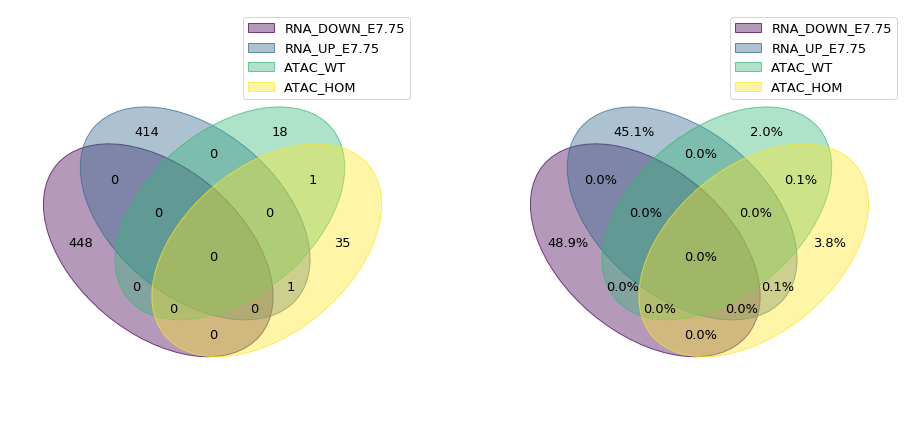

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 16))
data_venn = {
    'RNA_DOWN_E7.75': set(RNA_DEG_7_75_down['Gene name']),
    'RNA_UP_E7.75': set(RNA_DEG_7_75_up['Gene name']),
    'ATAC_WT': set(ATAC_DEP_7_75_WT['Gene Name']),
    'ATAC_HOM': set(ATAC_DEP_7_75_HOM['Gene Name'])
}
venn(data_venn, ax = ax1)
venn(data_venn, fmt="{percentage:.1f}%", ax = ax2)

In [17]:
close_but_up = ATAC_DEP_7_75_HOM[
    (ATAC_DEP_7_75_HOM['Gene Name'].isin(RNA_DEG_7_75_up['Gene name']))
    & (~ATAC_DEP_7_75_HOM['Gene Name'].isin(ATAC_DEP_7_75_WT['Gene Name']))]
close_but_up.head()

,PeakID (cmd=annotatePeaks.pl homer_diff_peaks_MUT2.txt mm10 -cpu 10),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
6,Peak_221394,chr13,116044068,116044181,+,0.0,0.0,Intergenic,Lx8b|LINE|L1,265564,NM_021459,16392,Mm.42242,NM_021459,ENSMUSG00000042258,Isl1,-,"ISL1 transcription factor, LIM/homeodomain",protein-coding
